In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
payment_fraud_df = pd.read_csv('./online_payments_fraud_detection_dataset.csv')

payment_fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


**<h1>Exploratory Data Analysis</h1>**

In [3]:
print(f"Shape of the dataset {payment_fraud_df.shape}")
print(f"The dataset has {payment_fraud_df.shape[0]} rows and {payment_fraud_df.shape[1]} columns")

Shape of the dataset (6362620, 11)
The dataset has 6362620 rows and 11 columns


In [4]:
# All the feature details of the dataset

payment_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# total features (initially) 
features_names = payment_fraud_df.columns.tolist()
print(f"There are total {len(features_names)} features")
print(features_names)

There are total 11 features
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [6]:
numerical_features_data = payment_fraud_df.select_dtypes(include='number')
numerical_features_name = numerical_features_data.columns.tolist()

print(f"There are total {len(numerical_features_name)} numerical features")
print(numerical_features_name)

There are total 8 numerical features
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [7]:
categorical_features_data = payment_fraud_df.select_dtypes(include='object')
categorical_features_name_list = categorical_features_data.columns.tolist()

print(f"There are total {len(categorical_features_name_list)} categorical features")
print(categorical_features_name_list)

There are total 3 categorical features
['type', 'nameOrig', 'nameDest']


In [8]:
categorical_features_data.describe().T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1677795071,3
nameDest,6362620,2722362,C1286084959,113


In [9]:
numerical_features_data.var()

step              2.025839e+04
amount            3.646448e+11
oldbalanceOrg     8.341946e+12
newbalanceOrig    8.550060e+12
oldbalanceDest    1.155443e+13
newbalanceDest    1.349922e+13
isFraud           1.289154e-03
isFlaggedFraud    2.514681e-06
dtype: float64

In [10]:
numerical_features_data.skew()

step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

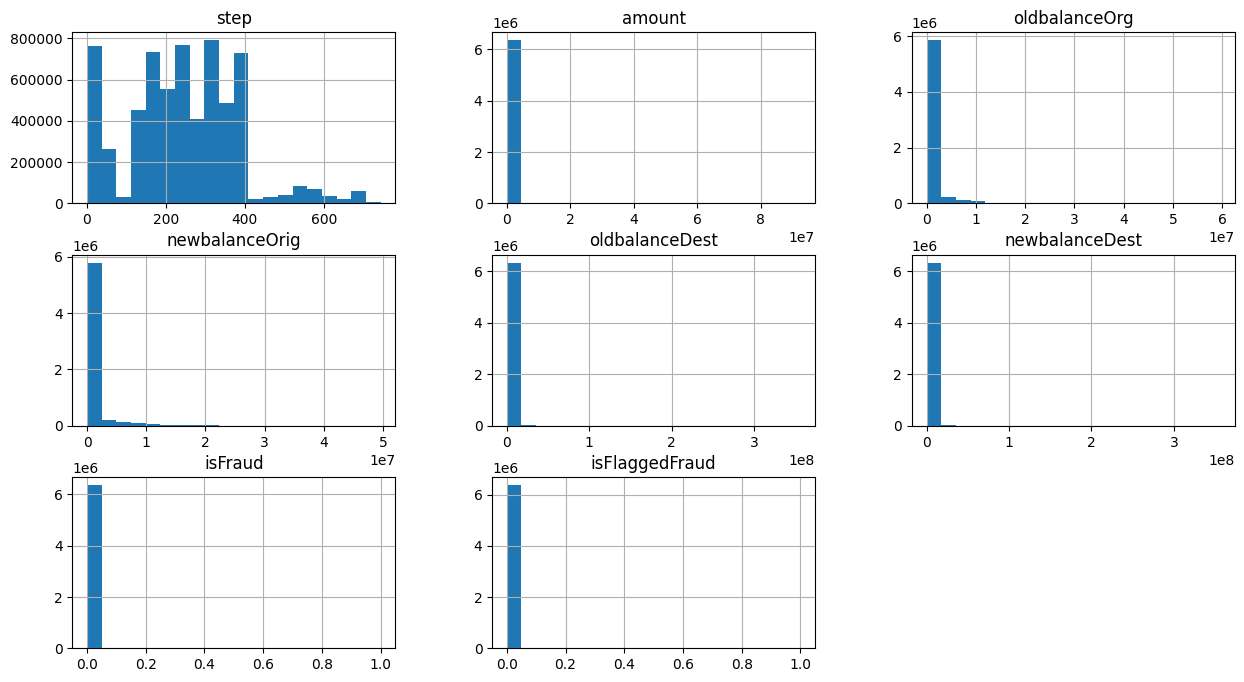

In [11]:
numerical_features_data.hist(figsize=(15,8),bins=20)
plt.show()

**<h1>Data preprocessing</h1>**

In [12]:
initial_null_values = payment_fraud_df.isnull().sum()
initial_null_values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As There are no null values in the dataset, No imputation or row/column removal is needed for missing data

In [13]:
print(f"Only {payment_fraud_df['isFlaggedFraud'].sum()} payments are flagged as fraud out of {payment_fraud_df.shape[0]} transactions!\nSo this feature (isFlaggedFraud) may leak target")

print(f'"nameOrig" and "nameDest" are also not useful for modeling, and these may introduce noise')

Only 16 payments are flagged as fraud out of 6362620 transactions!
So this feature (isFlaggedFraud) may leak target
"nameOrig" and "nameDest" are also not useful for modeling, and these may introduce noise


In [14]:
# deleting less relevant columns

payment_fraud_df = payment_fraud_df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"])

In [15]:
# current state of the dataframe
payment_fraud_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [16]:
# after deleting (Categorical data)

categorical_features_data = payment_fraud_df.select_dtypes(include='object')
categorical_features_name_list = categorical_features_data.columns.tolist()

print(f"There are total {len(categorical_features_name_list)} categorical features")
print(categorical_features_name_list)

There are total 1 categorical features
['type']


In [17]:
unique_categorical_data_count = categorical_features_data.nunique()
print(unique_categorical_data_count)

type    5
dtype: int64


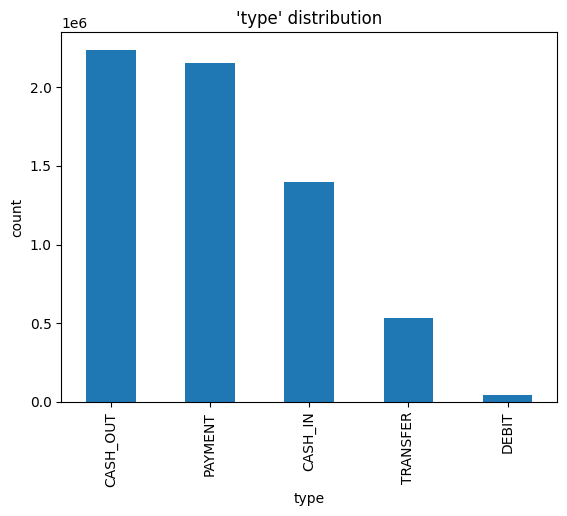

In [18]:
# as there is only 1 column, this loop will run only once!
for column in categorical_features_name_list:
    plt.title(f"'{column}' distribution")
    categorical_features_data[column].value_counts().plot(kind="bar", ylabel='count')
    plt.show()

**<h3>Encoding categorical data</h3>**

Machine learning models require numerical input, so we need to convert this categorical column into a numerical format using encoding to make it usable for training.

In [19]:
label_encoder = LabelEncoder()

payment_fraud_df['type'] = label_encoder.fit_transform(payment_fraud_df['type'])

payment_fraud_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


In [20]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Categorical values are encoded like this: ")
for key, value in label_mapping.items():
    print(f"{key} = {value}")

Categorical values are encoded like this: 
CASH_IN = 0
CASH_OUT = 1
DEBIT = 2
PAYMENT = 3
TRANSFER = 4


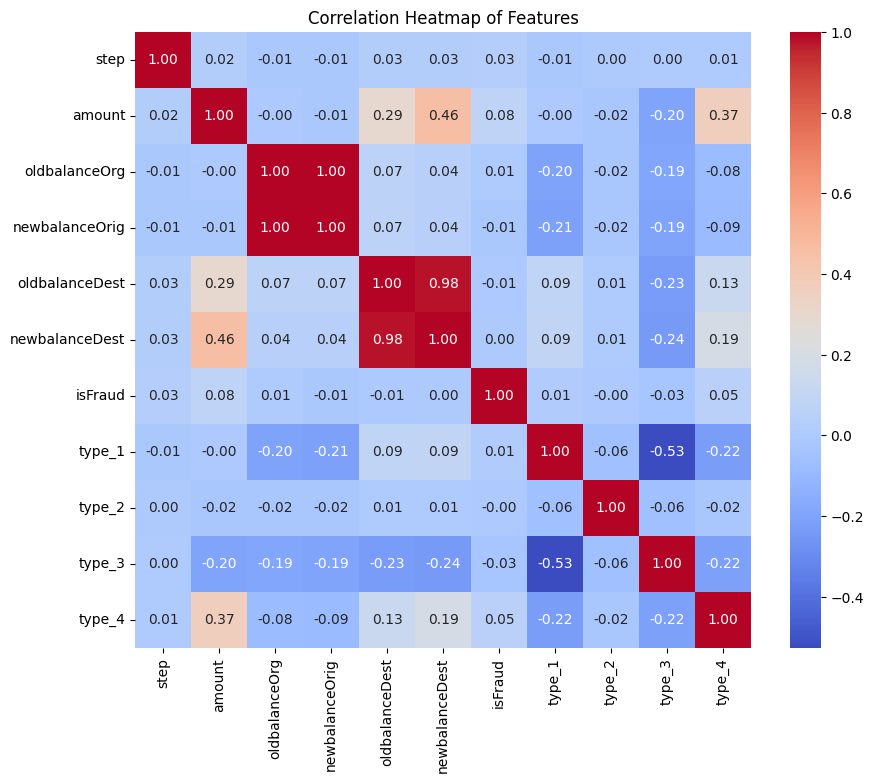

In [21]:

df_encoded = pd.get_dummies(payment_fraud_df, columns=['type'], drop_first=True)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

"oldbalanceOrg" and "newbalanceOrig" these two attributes are in perfect correlation (1.00). This indicates these two values are identical. </br>
Similarly, "oldbalanceDest" and "newbalanceDest" also possess almost perfect correlation (0.98), indicating they are almost the same.

In [22]:
# removing the dependencies by dropping one of the columns from each pair
payment_fraud_df = payment_fraud_df.drop(columns=["newbalanceOrig", "newbalanceDest"])

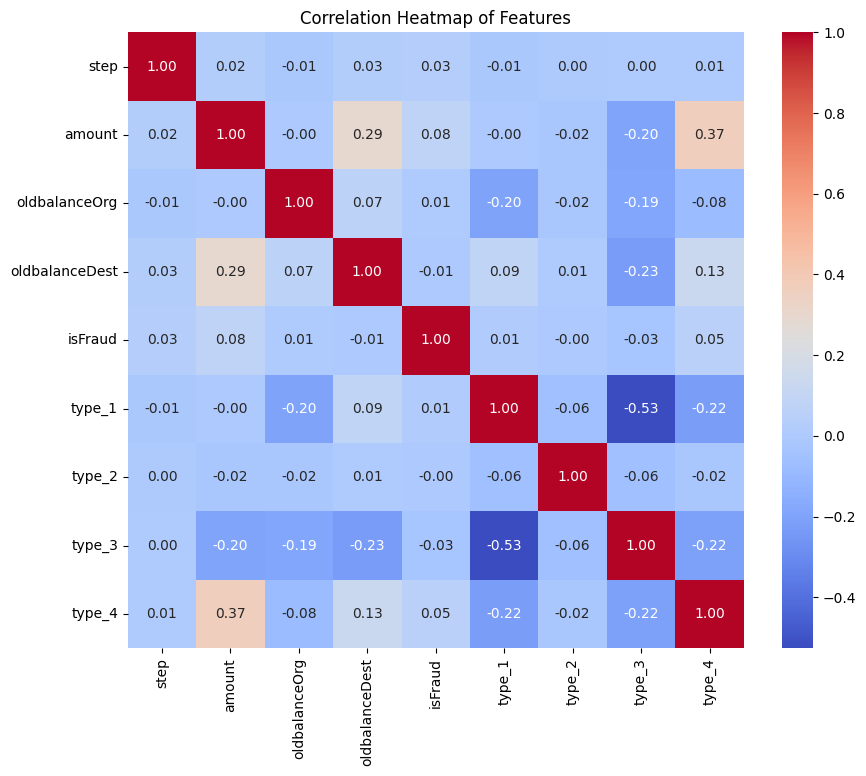

In [23]:
df_encoded = pd.get_dummies(payment_fraud_df, columns=['type'], drop_first=True)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

In [24]:

output_feature = 'isFraud'
payment_fraud_df[output_feature].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [25]:
output_count_list = payment_fraud_df[output_feature].value_counts().tolist()

total_outputs = payment_fraud_df.shape[0]

labels = ["Not Fraud", "Fraud"]
percentage = []

for value in output_count_list:
    percentage.append((value/total_outputs)*100)

print(f"Percentage: {percentage}")

Percentage: [99.87091795518198, 0.12908204481801522]


Not fraud: 99.87%
Fraud: 0.13%


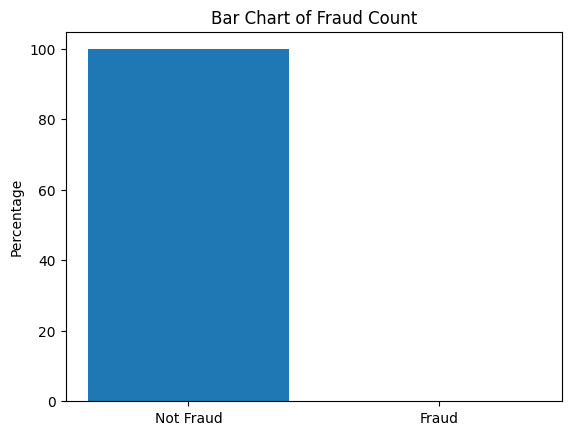

In [26]:
barChart_labels = ["Not Fraud", "Fraud"]
notFraud, isFraud = payment_fraud_df[output_feature].value_counts().tolist()

plt.bar(barChart_labels, percentage)
plt.ylabel("Percentage")
plt.title('Bar Chart of Fraud Count')


print(f"Not fraud: {round(percentage[0], 2)}%")
print(f"Fraud: {round(percentage[1], 2)}%")

There is a massive class imbalance in the dataset. This biases machine learning models towards the majority class. 
The model becomes good at predicting the majority class but bad at the minority one.</br> Overall accuracy can be misleadingly high. 
Detection of the rare, valuable class becomes difficult. Fixing this imbalance is crucial for a helpful model. The model will be biased towards 'not fraud' results.

**<h3>Scaling<h3>**

In [27]:

robust_scaler = RobustScaler()

In [28]:
features = payment_fraud_df.drop(columns=['isFraud'])
target = payment_fraud_df['isFraud']


X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [29]:
robust_scaler.fit(X_train)

robust_scaled_X_train = robust_scaler.transform(X_train)

In [30]:
robust_scaler.fit(X_test)

robust_scaled_X_test = robust_scaler.transform(X_test)

In [31]:
print("Per feature minimum before scaling")
print(X_train.min(axis=0))

Per feature minimum before scaling
step              1.0
type              0.0
amount            0.0
oldbalanceOrg     0.0
oldbalanceDest    0.0
dtype: float64


In [32]:
# robust scaling
print("Per feature minimum after robust scaling")
print(robust_scaled_X_train.min(axis=0))

Per feature minimum after robust scaling
[-1.32960894 -0.5        -0.38294715 -0.13279552 -0.14073877]


In [33]:
print("Per feature maximum before scaling")
X_train.max(axis=0)

Per feature maximum before scaling


step              7.430000e+02
type              4.000000e+00
amount            9.244552e+07
oldbalanceOrg     5.958504e+07
oldbalanceDest    3.560159e+08
dtype: float64

In [34]:
print("Per feature minimum after robust scaling")
print(robust_scaled_X_train.max(axis=0))

Per feature minimum after robust scaling
[  2.81564246   1.5        472.86666688 555.56821049 377.75894427]


In [35]:
X_train

,step,type,amount,oldbalanceOrg,oldbalanceDest
6144590,545,0,171231.46,457.00,54999.62
3201282,249,3,2858.25,0.00,0.00
4110413,302,0,116720.40,5761211.23,524292.67
5179672,359,1,260323.97,110.00,3092811.53
4187011,305,1,66806.24,0.00,267095.59
...,...,...,...,...,...
5030793,354,1,156973.09,257335.00,6697137.26
491263,19,1,140745.33,0.00,1880641.65
3937352,286,1,128095.40,0.00,8557281.75
4686059,331,3,5504.70,0.00,0.00


In [36]:
robust_scaled_X_train

array([[ 1.70949721, -0.5       ,  0.49362561, -0.12853346, -0.0823584 ],
       [ 0.05586592,  1.        , -0.36831512, -0.13279552, -0.14073877],
       [ 0.35195531, -0.5       ,  0.21457111, 53.5973162 ,  0.41578143],
       ...,
       [ 0.26256983,  0.        ,  0.27280232, -0.13279552,  8.942547  ],
       [ 0.51396648,  1.        , -0.35476734, -0.13279552, -0.14073877],
       [ 0.38547486,  1.        , -0.17136242, -0.11206342, -0.14073877]],
      shape=(4453834, 5))

**<h1>Logistic Regression</h1>**

In [37]:
logistic_regression_classifier = LogisticRegression(max_iter=5000)

logistic_regression_classifier.fit(robust_scaled_X_train, Y_train)

LogisticRegression(max_iter=5000)

In [38]:
Y_predicted_logistic = logistic_regression_classifier.predict(robust_scaled_X_test)

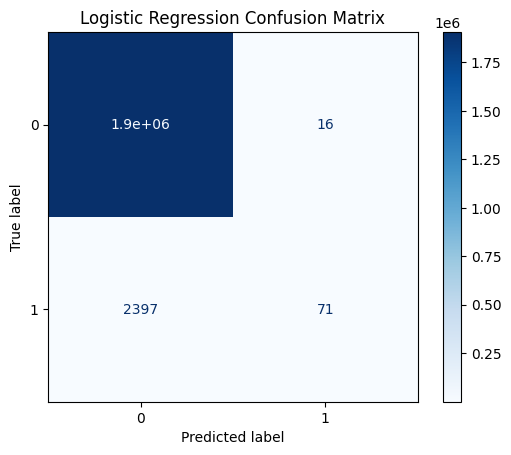

Logistic Regression model results:
Accuracy:  99.87%
Precision:  81.61%
Recall:  2.88%
F1 Score:  5.56%


In [39]:

# Logistic Regression confusion matrix
cm_logistic = confusion_matrix(Y_test, Y_predicted_logistic)
ConfusionMatrixDisplay(cm_logistic).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Logistic Regression model results:")
print(f"Accuracy:  {round(accuracy_score(Y_test, Y_predicted_logistic)*100 , 2)}%")
print(f"Precision:  {round(precision_score(Y_test, Y_predicted_logistic)*100 , 2)}%")
print(f"Recall:  {round(recall_score(Y_test, Y_predicted_logistic)*100 , 2)}%")
print(f"F1 Score:  {round(f1_score(Y_test, Y_predicted_logistic)*100 , 2)}%")

**<h1>Decision Tree</h1>**
decision tree does not require scaled data

In [40]:
tree_classifier =  DecisionTreeClassifier()

tree_classifier.fit(X_train, Y_train)


DecisionTreeClassifier()

In [41]:
Y_predicted_tree = tree_classifier.predict(X_test)

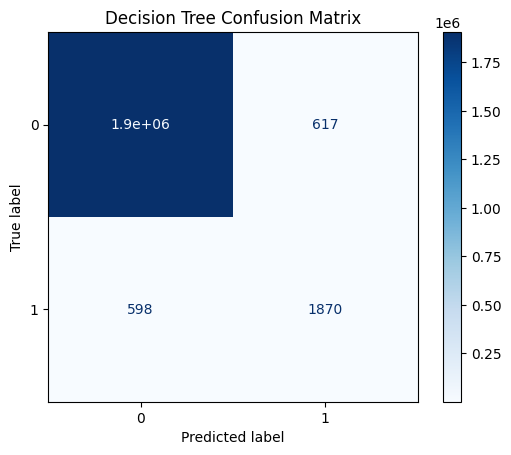

Decision tree model results:
Accuracy:  99.94%
Precision:  75.19%
Recall:  75.77%
F1 Score:  75.48%


In [42]:
# Decision tree confusion matrix and results

cm_tree = confusion_matrix(Y_test, Y_predicted_tree)
ConfusionMatrixDisplay(cm_tree).plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Decision tree model results:")
print(f"Accuracy:  {round(accuracy_score(Y_test, Y_predicted_tree)*100 , 2)}%")
print(f"Precision:  {round(precision_score(Y_test, Y_predicted_tree)*100 , 2)}%")
print(f"Recall:  {round(recall_score(Y_test, Y_predicted_tree)*100 , 2)}%")
print(f"F1 Score:  {round(f1_score(Y_test, Y_predicted_tree)*100 , 2)}%")

**<h1>Neural network</h1>**

In [43]:
#scaled

NN_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
NN_model.fit(robust_scaled_X_train, Y_train)

MLPClassifier(max_iter=300, random_state=42)

In [44]:
Y_predicted_NN = NN_model.predict(robust_scaled_X_test)

print(f"Robust scaled Neural Network Accuracy: {round(accuracy_score(Y_test, Y_predicted_NN)*100, 2)}%")

Robust scaled Neural Network Accuracy: 99.95%


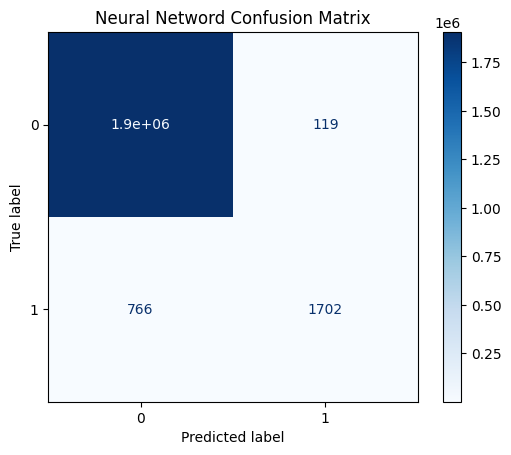

Neural Netword results
Accuracy:  99.95%
Precision:  93.47%
Recall:  68.96%
F1 Score:  79.37%


In [45]:
cm_NN = confusion_matrix(Y_test, Y_predicted_NN)
ConfusionMatrixDisplay(cm_NN).plot(cmap="Blues")
plt.title("Neural Netword Confusion Matrix")
plt.show()

print(f"Neural Netword results")
print(f"Accuracy:  {round(accuracy_score(Y_test, Y_predicted_NN)*100 , 2)}%")
print(f"Precision:  {round(precision_score(Y_test, Y_predicted_NN)*100 , 2)}%")
print(f"Recall:  {round(recall_score(Y_test, Y_predicted_NN)*100 , 2)}%")
print(f"F1 Score:  {round(f1_score(Y_test, Y_predicted_NN)*100 , 2)}%")

**<h1>ROC & AUC</h1>**

In [46]:
supervised_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Neural Network": MLPClassifier()
}

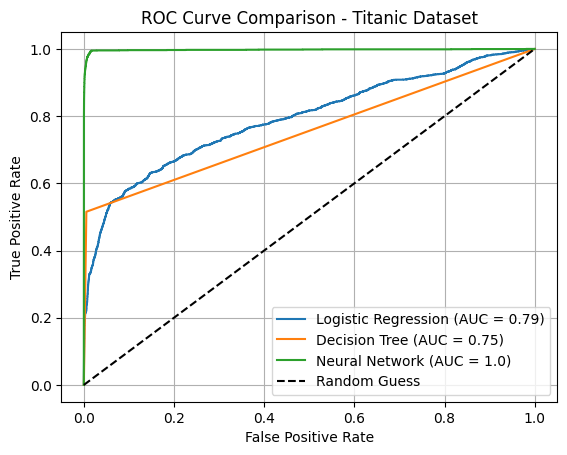

In [47]:
for model_name, model_classifier in supervised_models.items():
    model_classifier.fit(robust_scaled_X_train, Y_train)

    Y_probability_predict = model_classifier.predict_proba(robust_scaled_X_test)[:, 1]

    false_positive_rate, true_positive_rate, _ = roc_curve(Y_test, Y_probability_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.plot(false_positive_rate, true_positive_rate, label=f"{model_name} (AUC = {round(roc_auc, 2)})")


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Titanic Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Text(0.5, 1.0, 'Prediction Accuracy of Classification Models')

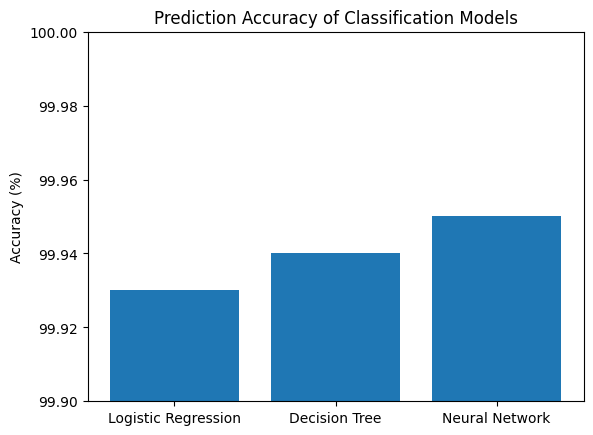

In [48]:
models = ['Logistic Regression', 'Decision Tree', 'Neural Network']
accuracies = [99.93, 99.94, 99.95]

bars = plt.bar(models, accuracies)
plt.ylim(99.90, 100.00)
plt.ylabel('Accuracy (%)')
plt.title('Prediction Accuracy of Classification Models')

In [49]:
print("Logistic Regression:")
print(classification_report(Y_test, Y_predicted_logistic))

print("Decision Tree")
print(classification_report(Y_test, Y_predicted_tree))

print("Neural Network")
print(classification_report(Y_test, Y_predicted_NN))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.82      0.03      0.06      2468

    accuracy                           1.00   1908786
   macro avg       0.91      0.51      0.53   1908786
weighted avg       1.00      1.00      1.00   1908786

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.75      0.76      0.75      2468

    accuracy                           1.00   1908786
   macro avg       0.88      0.88      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786

Neural Network
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.93      0.69      0.79      2468

    accuracy                           1.00   1908786
   macro avg       0.97      0.84      0.90   1908786
weighted avg       1.00 